In [2]:
# Next word prediction
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
text = open('1661-0.txt', encoding='utf-8').read().lower()
text=text.replace('\n',' ')
text=text.replace('\r',' ')
text=text.replace('  ',' ')


In [3]:
tokenazer=RegexpTokenizer(r'\w+') # remove punctuation
tokens=tokenazer.tokenize(text)

In [4]:
inique=np.unique(tokens)
unique_word_index={w:i for i,w in enumerate(inique)}
unique_word_index

{'0': 0,
 '000': 1,
 '1': 2,
 '10': 3,
 '100': 4,
 '1000': 5,
 '10_s_': 6,
 '10th': 7,
 '11': 8,
 '117': 9,
 '120': 10,
 '12_s_': 11,
 '12th': 12,
 '14': 13,
 '140': 14,
 '15': 15,
 '150': 16,
 '1500': 17,
 '1661': 18,
 '16a': 19,
 '17': 20,
 '1846': 21,
 '1858': 22,
 '1869': 23,
 '1870': 24,
 '1878': 25,
 '1883': 26,
 '1884': 27,
 '1887': 28,
 '1888': 29,
 '1890': 30,
 '19th': 31,
 '1_s_': 32,
 '2': 33,
 '20': 34,
 '200': 35,
 '2001': 36,
 '2002': 37,
 '2019': 38,
 '220': 39,
 '221b': 40,
 '226': 41,
 '22nd': 42,
 '249': 43,
 '25': 44,
 '250': 45,
 '26': 46,
 '26_s_': 47,
 '27': 48,
 '270': 49,
 '29': 50,
 '2_s_': 51,
 '2nd': 52,
 '3': 53,
 '30': 54,
 '31': 55,
 '35': 56,
 '3rd': 57,
 '4': 58,
 '40': 59,
 '4000': 60,
 '421': 61,
 '4700': 62,
 '4_d_': 63,
 '4th': 64,
 '4½': 65,
 '5': 66,
 '50': 67,
 '501': 68,
 '596': 69,
 '6': 70,
 '60': 71,
 '6221541': 72,
 '64': 73,
 '6_d_': 74,
 '7': 75,
 '700': 76,
 '750': 77,
 '750175': 78,
 '77': 79,
 '7_s_': 80,
 '7th': 81,
 '8': 82,
 '801': 83

In [5]:
word_legth=5
preveios_word=[]
next_word=[]
for i in range(len(tokens)-word_legth):
    preveios_word.append(tokens[i:i+word_legth])
    next_word.append(tokens[i+word_legth])
preveios_word[15],next_word[15]

(['for', 'the', 'use', 'of', 'anyone'], 'anywhere')

In [6]:
X=np.zeros((len(preveios_word),word_legth,len(unique_word_index)),dtype=bool)
y=np.zeros((len(next_word),len(unique_word_index)),dtype=bool)
for i,each in enumerate(preveios_word):
    for j,each_word in enumerate(each):
        X[i,j,unique_word_index[each_word]]=1
    y[i,unique_word_index[next_word[i]]]=1


In [7]:
model=Sequential()
model.add(LSTM(128,input_shape=(word_legth,len(unique_word_index))))   
model.add(Dense(len(unique_word_index)))
model.add(Activation('softmax'))
optimizer=RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.summary()
history=model.fit(X,y,validation_split=0.05,batch_size=128,epochs=2,shuffle=True).history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               4264960   
                                                                 
 dense (Dense)               (None, 8201)              1057929   
                                                                 
 activation (Activation)     (None, 8201)              0         
                                                                 
Total params: 5322889 (20.31 MB)
Trainable params: 5322889 (20.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
811/811 [==============================] - 128s 153ms/step - loss: 6.2935 - accuracy: 0.0740 - val_loss: 6.9790 - val_accuracy: 0.0789
Epoch 2/2
811/811 [==============================] - 112s 138ms/step - loss: 5.7345 - accuracy: 0.1166 - val_loss: 6.7855 - val_accurac

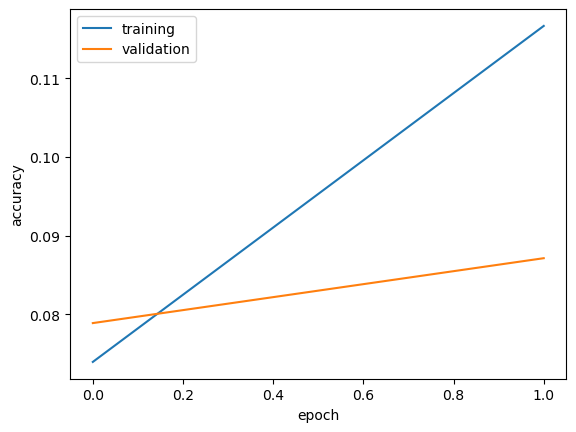

In [11]:
# I don't know why it doesn't work
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

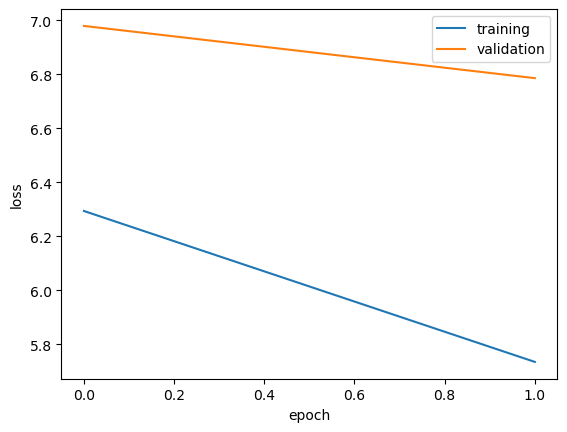

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['training','validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
def prepare_input(text):
    x = np.zeros((1, word_legth, len(inique)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [26]:
import heapq
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [27]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [28]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [29]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [30]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
it
is
not
a
lack
of


IndexError: index 5 is out of bounds for axis 1 with size 5